In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

---
#3. Data Analysis
## Addressing outliers before deducing speed
## Further data visualizations for presentation
---

In [2]:
location = "/Users/mrgholt/GADS-22-NYC/Citibike_Data/"

dfJanComplete = pd.read_csv(location + "dfJanComplete.csv")
dfFebComplete = pd.read_csv(location + "dfFebComplete.csv")
dfMarComplete = pd.read_csv(location + "dfMarComplete.csv")
dfAprComplete = pd.read_csv(location + "dfAprComplete.csv")
dfMayComplete = pd.read_csv(location + "dfMayComplete.csv")
dfJunComplete = pd.read_csv(location + "dfJunComplete.csv")
dfJulComplete = pd.read_csv(location + "dfJulComplete.csv")
dfAugComplete = pd.read_csv(location + "dfAugComplete.csv")
dfSepComplete = pd.read_csv(location + "dfSepComplete.csv")
dfOctComplete = pd.read_csv(location + "dfOctComplete.csv")
dfNovComplete = pd.read_csv(location + "dfNovComplete.csv")
dfDecComplete = pd.read_csv(location + "dfDecComplete.csv")

In [3]:
for i in dfDecComplete.columns:
    print i, 

Unnamed: 0 day tripduration starttime stoptime start.station.id start.station.name start.station.latitude start.station.longitude end.station.id end.station.name end.station.latitude end.station.longitude bikeid usertype birth.year gender distance zip elev dew precip hum snow temp windspeed visibility windchill heatindex fog rain hail thunder tornado


---
##Go through all the files and look at the min, max, mean and median distance - for consistency
##We have a file where 500 rows contain no distance information
##There are lots of obvious data errors
---

In [4]:
def check_all_files(file_list):
    print "min distance"
    for i, f in enumerate(file_list):
        print "{:7.5f}".format(f.distance.min()),
    
    print "\n"

    print "max distance"
    for f in file_list:
        print "{:7.5f}".format(f.distance.max()),
    
    print "\n"

    print "mean distance"
    for f in file_list:
        print "{:7.5f}".format(f.distance.mean()),
    
    print "\n"

    print "median distance"
    for f in file_list:
        print "{:7.5f}".format(f.distance.median()),
        
    print "\n"

    print "min trip duration"
    for f in file_list:
        print "{:7.1f}".format(f.tripduration.min()),
        
    print "\n"
    
    print "max trip duration"
    for f in file_list:
        print "{:7.1f}".format(f.tripduration.max()),
        
    print "\n"

    print "mean trip duration"
    for f in file_list:
        print "{:7.1f}".format(f.tripduration.mean()),
        
    print "\n"

    print "median trip duration"
    for f in file_list:
        print "{:7.1f}".format(f.tripduration.median()),
        
    print "\n"

In [5]:
file_list = [dfJanComplete, dfFebComplete, dfMarComplete, dfAprComplete, dfMayComplete, dfJunComplete,
             dfJulComplete, dfAugComplete, dfSepComplete, dfOctComplete, dfNovComplete, dfDecComplete] 
check_all_files(file_list)

min distance
0.15500 0.00000 0.00000 0.15500 0.00000 0.00000 0.21400 0.16400 0.00000 0.17400 0.16200 0.00000 

max distance
5.20500 4.75500 6.62100 8.98500 4.32500 5.20500 5.51100 5.20500 5.29500 5.20500 5.29500 5.27600 

mean distance
0.94682 0.97629 0.92726 0.91705 0.46061 0.91783 0.92128 0.91252 0.89679 0.91102 0.90626 0.87500 

median distance
0.85100 0.85800 0.83000 0.83100 0.08350 0.83150 0.83550 0.83000 0.81150 0.83450 0.81900 0.81200 

min trip duration
   78.0    72.0    62.0    63.0    70.0    63.0    66.0    67.0    64.0    61.0    65.0    60.0 

max trip duration
 1391.0  1317.0  1508.0  1291.0  1113.0  1348.0  1554.0  1140.0   989.0  1162.0  1299.0  1000.0 

mean trip duration
  312.7   338.7   294.4   282.1   286.4   286.7   289.0   283.7   272.8   268.8   279.2   285.5 

median trip duration
  279.0   301.5   261.5   257.0   263.0   264.0   262.0   264.5   249.5   248.5   255.0   260.0 



In [6]:
dfFebComplete = dfFebComplete[dfFebComplete.distance > 0.0]
dfMarComplete = dfMarComplete[dfMarComplete.distance > 0.0]
dfMayComplete = dfMayComplete[dfMayComplete.distance > 0.0]
dfJunComplete = dfJunComplete[dfJunComplete.distance > 0.0]
dfSepComplete = dfSepComplete[dfSepComplete.distance > 0.0]

In [7]:
file_list = [dfJanComplete, dfFebComplete, dfMarComplete, dfAprComplete, dfMayComplete, dfJunComplete,
             dfJulComplete, dfAugComplete, dfSepComplete, dfOctComplete, dfNovComplete, dfDecComplete] 
check_all_files(file_list)

min distance
0.15500 0.16700 0.15500 0.15500 0.16700 0.18300 0.21400 0.16400 0.13200 0.17400 0.16200 0.00000 

max distance
5.20500 4.75500 6.62100 8.98500 4.32500 5.20500 5.51100 5.20500 5.29500 5.20500 5.29500 5.27600 

mean distance
0.94682 0.97727 0.92819 0.91705 0.92121 0.91875 0.92128 0.91252 0.89769 0.91102 0.90626 0.87500 

median distance
0.85100 0.85800 0.83000 0.83100 0.84900 0.83200 0.83550 0.83000 0.81200 0.83450 0.81900 0.81200 

min trip duration
   78.0    72.0    62.0    63.0    70.0    63.0    66.0    67.0    64.0    61.0    65.0    60.0 

max trip duration
 1391.0  1317.0  1508.0  1291.0  1113.0  1348.0  1554.0  1140.0   989.0  1162.0  1299.0  1000.0 

mean trip duration
  312.7   338.8   294.5   282.1   280.2   286.8   289.0   283.7   272.9   268.8   279.2   285.5 

median trip duration
  279.0   302.0   262.0   257.0   258.5   264.0   262.0   264.5   250.0   248.5   255.0   260.0 



---
##Now re-check our data volumes on a per month basis
---

In [8]:
for f in file_list:
    print f.count()[0]

1000
999
999
1000
500
999
1000
1000
999
1000
1000
1001


---
##Calculating speed
---

In [9]:
def calculate_speed(df, num):
    speed_list = []
    for i in xrange(num):
        temp = df.iloc[i].tripduration/3600.0
        speed = df.iloc[i].distance/temp
        speed_list.append(speed)
    return speed_list

---
##Calculate the speed columns for all the months
---

In [10]:
def calc_all_speeds(df):
    df['speed'] = calculate_speed(df, len(df))
    return df

In [11]:
def print_pars(df):
    print "{:9.3f}, {:9.3f}, {:9.3f}, {:9.3f}".format(df.min(), df.max(), df.mean(), df.median())

In [12]:
#file_list = [dfJanComplete, dfFebComplete, dfMarComplete, dfAprComplete, dfMayComplete, dfJunComplete,
#             dfJulComplete, dfAugComplete, dfSepComplete, dfOctComplete, dfNovComplete, dfDecComplete] #

#print "speed min, speed max, speed mean, speed median"
#for df in file_list:
#   print_pars(df.speed)

In [13]:
def get_outlier_thresholds(x):
    lower_25 = x.quantile(0.25)
    upper_75 = x.quantile(0.75)
    high_threshold = upper_75 + 1.5 * (upper_75-lower_25)
    low_threshold = lower_25 - 1.5 * (upper_75-lower_25)
    return(low_threshold, high_threshold)

def remove_outliers(x, low, high):
    if x > high:
        return np.nan
    elif x < low:
        return np.nan
    else:
        return x

In [14]:
#low, high = get_outlier_thresholds(dfJanComplete.speed)
#print low, high
#new_speed = dfJanComplete.speed.map((lambda x: remove_outliers(x, low, high)))
#dfJanComplete.speed = new_speed

In [15]:
def handle_outliers(df, column_name):
    low_threshold, high_threshold = get_outlier_thresholds(df[column_name])     
    new_column = df[column_name].map((lambda x: remove_outliers(x, low_threshold, high_threshold)))
    return new_column

---
#Address outliers - in tripduration and distance
---

In [16]:
file_list = [dfJanComplete, dfFebComplete, dfMarComplete, dfAprComplete, dfMayComplete, dfJunComplete,
             dfJulComplete, dfAugComplete, dfSepComplete, dfOctComplete, dfNovComplete, dfDecComplete] 

cols_f = ['tripduration', 'distance']

for df in file_list:
    for c in cols_f:
        df[c] = handle_outliers(df, c)

---
##Now calculate the speed
---

In [17]:
file_list = [dfJanComplete, dfFebComplete, dfMarComplete, dfAprComplete, dfMayComplete, dfJunComplete,
             dfJulComplete, dfAugComplete, dfSepComplete, dfOctComplete, dfNovComplete, dfDecComplete] 

for df in file_list:
    df = calc_all_speeds(df)

In [18]:
file_list = [dfJanComplete, dfFebComplete, dfMarComplete, dfAprComplete, dfMayComplete, dfJunComplete,
             dfJulComplete, dfAugComplete, dfSepComplete, dfOctComplete, dfNovComplete, dfDecComplete] 

print "speed min, speed max, speed mean, speed median"
for df in file_list:
    print_pars(df.speed)

speed min, speed max, speed mean, speed median
    6.196,    27.355,    11.074,    10.325
    5.381,    31.636,    10.495,     9.808
    5.241,    41.018,    11.514,    10.674
    5.636,    42.971,    11.742,    10.979
    7.063,    31.876,    11.856,    11.038
    6.873,    33.817,    11.677,    10.945
    7.068,    41.018,    11.587,    10.903
    6.427,    36.096,    11.689,    11.001
    5.888,    42.754,    11.912,    10.800
    6.591,    48.351,    12.269,    11.086
    5.989,    42.372,    11.787,    10.942
    0.000,    42.937,    11.381,    10.509


---
##Address the speed outliers
---

In [19]:
file_list = [dfJanComplete, dfFebComplete, dfMarComplete, dfAprComplete, dfMayComplete, dfJunComplete,
             dfJulComplete, dfAugComplete, dfSepComplete, dfOctComplete, dfNovComplete, dfDecComplete] 

cols_f = ['speed']

for df in file_list:
    for c in cols_f:
        df[c] = handle_outliers(df, c)

In [20]:
file_list = [dfJanComplete, dfFebComplete, dfMarComplete, dfAprComplete, dfMayComplete, dfJunComplete,
             dfJulComplete, dfAugComplete, dfSepComplete, dfOctComplete, dfNovComplete, dfDecComplete] 

print "speed min, speed max, speed mean, speed median"
for df in file_list:
    print_pars(df.speed)

speed min, speed max, speed mean, speed median
    6.196,    16.418,    10.463,    10.127
    5.381,    15.985,    10.067,     9.717
    5.241,    17.167,    10.855,    10.523
    5.636,    17.608,    11.195,    10.769
    7.063,    17.492,    11.408,    10.897
    6.873,    17.670,    11.239,    10.822
    7.068,    17.110,    11.166,    10.765
    6.427,    17.349,    11.236,    10.910
    5.888,    17.843,    11.032,    10.589
    6.591,    18.688,    11.356,    10.800
    5.989,    17.676,    11.082,    10.719
    6.686,    16.894,    10.709,    10.329


---
##Address the elevation outliers
---

In [21]:
file_list = [dfJanComplete, dfFebComplete, dfMarComplete, dfAprComplete, dfMayComplete, dfJunComplete,
             dfJulComplete, dfAugComplete, dfSepComplete, dfOctComplete, dfNovComplete, dfDecComplete] 

cols_f = ['elev']

for df in file_list:
    for c in cols_f:
        df[c] = handle_outliers(df, c)

---
##Re-look at the monthly data counts
---

In [24]:
dfJanComplete = dfJanComplete.dropna()
dfJanComplete = dfJanComplete.reset_index()
dfFebComplete = dfFebComplete.dropna()
dfFebComplete = dfFebComplete.reset_index()
dfMarComplete = dfMarComplete.dropna()
dfMarComplete = dfMarComplete.reset_index()
dfAprComplete = dfAprComplete.dropna()
dfAprComplete = dfAprComplete.reset_index()
dfMayComplete = dfMayComplete.dropna()
dfMayComplete = dfMayComplete.reset_index()
dfJunComplete = dfJunComplete.dropna()
dfJunComplete = dfJunComplete.reset_index()
dfJulComplete = dfJulComplete.dropna()
dfJulComplete = dfJulComplete.reset_index()
dfAugComplete = dfAugComplete.dropna()
dfAugComplete = dfAugComplete.reset_index()
dfSepComplete = dfSepComplete.dropna()
dfSepComplete = dfSepComplete.reset_index()
dfOctComplete = dfOctComplete.dropna()
dfOctComplete = dfOctComplete.reset_index()
dfNovComplete = dfNovComplete.dropna()
dfNovComplete = dfNovComplete.reset_index()
dfDecComplete = dfDecComplete.dropna()
dfDecComplete = dfDecComplete.reset_index()

In [26]:
file_list = [dfJanComplete, dfFebComplete, dfMarComplete, dfAprComplete, dfMayComplete, dfJunComplete,
             dfJulComplete, dfAugComplete, dfSepComplete, dfOctComplete, dfNovComplete, dfDecComplete]

for f in file_list:
    print f.count()[0]

643
666
652
686
334
714
683
684
645
643
654
659


---
##Combine the monthly datasets into a full unitary dataset
---

In [28]:
dfAll = dfJanComplete.copy()
dfAll = dfAll.append(dfFebComplete, ignore_index = True)
dfAll = dfAll.append(dfMarComplete, ignore_index = True)
dfAll = dfAll.append(dfAprComplete, ignore_index = True)
dfAll = dfAll.append(dfMayComplete, ignore_index = True)
dfAll = dfAll.append(dfJunComplete, ignore_index = True)
dfAll = dfAll.append(dfJulComplete, ignore_index = True)
dfAll = dfAll.append(dfAugComplete, ignore_index = True)
dfAll = dfAll.append(dfSepComplete, ignore_index = True)
dfAll = dfAll.append(dfOctComplete, ignore_index = True)
dfAll = dfAll.append(dfNovComplete, ignore_index = True)
dfAll = dfAll.append(dfDecComplete, ignore_index = True)

In [29]:
dfAll.columns

Index([u'index', u'Unnamed: 0', u'day', u'tripduration', u'starttime', u'stoptime', u'start.station.id', u'start.station.name', u'start.station.latitude', u'start.station.longitude', u'end.station.id', u'end.station.name', u'end.station.latitude', u'end.station.longitude', u'bikeid', u'usertype', u'birth.year', u'gender', u'distance', u'zip', u'elev', u'dew', u'precip', u'hum', u'snow', u'temp', u'windspeed', u'visibility', u'windchill', u'heatindex', u'fog', u'rain', u'hail', u'thunder', u'tornado', u'speed'], dtype='object')

In [30]:
dfAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7663 entries, 0 to 7662
Data columns (total 36 columns):
index                      7663 non-null int64
Unnamed: 0                 7663 non-null int64
day                        7663 non-null object
tripduration               7663 non-null float64
starttime                  7663 non-null object
stoptime                   7663 non-null object
start.station.id           7663 non-null int64
start.station.name         7663 non-null object
start.station.latitude     7663 non-null float64
start.station.longitude    7663 non-null float64
end.station.id             7663 non-null int64
end.station.name           7663 non-null object
end.station.latitude       7663 non-null float64
end.station.longitude      7663 non-null float64
bikeid                     7663 non-null int64
usertype                   7663 non-null object
birth.year                 7663 non-null int64
gender                     7663 non-null int64
distance                   7663

---
##Data Presentation 1
##Bike speed by month
---

In [31]:
dtm = []
for i in xrange(len(dfAll.starttime)):
    dt = datetime.strptime(dfAll.starttime.iloc[i], '%Y-%m-%d %H:%M:%S')
    dtm.append(dt.month)

In [32]:
dfAll['month'] = dtm

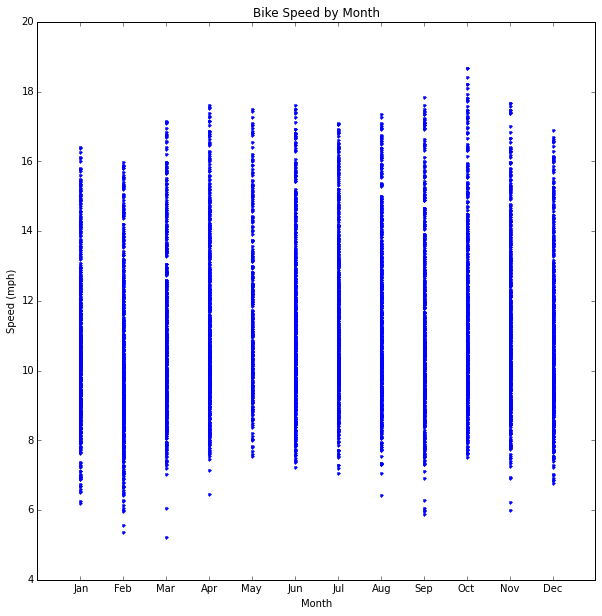

In [33]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111)
ax.set_xlim(0, 13)
ax.set_title("Bike Speed by Month")
ax.set_xlabel("Month")
ax.set_xticks(xrange(1, 13))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax.set_ylabel("Speed (mph)")
ax.plot(dfAll['month'], dfAll['speed'], '.')

---
##Data Presentation 2
##Temperature by month
---

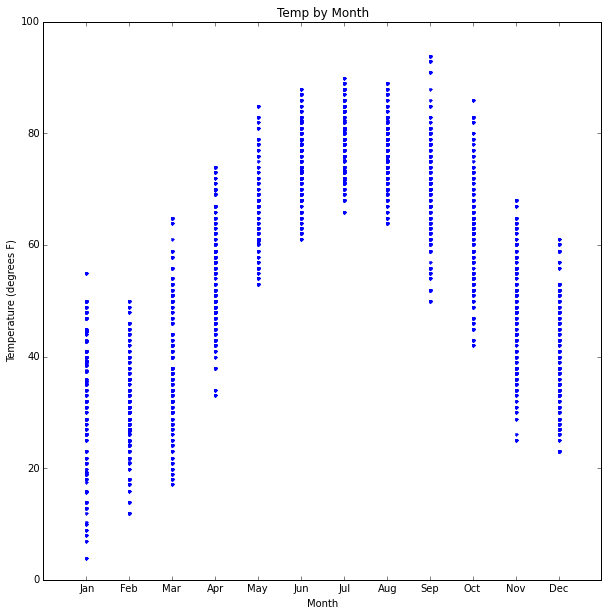

In [34]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(111)
ax.set_xticks(xrange(1, 13))
ax.set_xlim(0, 13)
ax.set_title("Temp by Month")
ax.set_xlabel("Month")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax.set_ylabel("Temperature (degrees F)")
ax.plot(dfAll['month'], dfAll['temp'], '.')

---
##Data Presentation 3
##Visual correlation of median bike speed variation and median temperature change
---

In [36]:
j1 =  dfJanComplete.speed.median()-dfAll.speed.median()
j2 =  dfFebComplete.speed.median()-dfAll.speed.median()
j3 =  dfMarComplete.speed.median()-dfAll.speed.median()
j4 =  dfAprComplete.speed.median()-dfAll.speed.median()
j5 =  dfMayComplete.speed.median()-dfAll.speed.median()
j6 =  dfJunComplete.speed.median()-dfAll.speed.median()
j7 =  dfJulComplete.speed.median()-dfAll.speed.median()
j8 =  dfAugComplete.speed.median()-dfAll.speed.median()
j9 =  dfSepComplete.speed.median()-dfAll.speed.median()
j10 = dfOctComplete.speed.median()-dfAll.speed.median()
j11 = dfNovComplete.speed.median()-dfAll.speed.median()
j12 = dfDecComplete.speed.median()-dfAll.speed.median()
median_speeds = [j1,j2,j3,j4,j5,j6,j7,j8,j9,j10,j11,j12]

In [38]:
j1 =  dfJanComplete.temp.median()-dfAll.temp.median()
j2 =  dfFebComplete.temp.median()-dfAll.temp.median()
j3 =  dfMarComplete.temp.median()-dfAll.temp.median()
j4 =  dfAprComplete.temp.median()-dfAll.temp.median()
j5 =  dfMayComplete.temp.median()-dfAll.temp.median()
j6 =  dfJunComplete.temp.median()-dfAll.temp.median()
j7 =  dfJulComplete.temp.median()-dfAll.temp.median()
j8 =  dfAugComplete.temp.median()-dfAll.temp.median()
j9 =  dfSepComplete.temp.median()-dfAll.temp.median()
j10 = dfOctComplete.temp.median()-dfAll.temp.median()
j11 = dfNovComplete.temp.median()-dfAll.temp.median()
j12 = dfDecComplete.temp.median()-dfAll.temp.median()
median_temps = [j1,j2,j3,j4,j5,j6,j7,j8,j9,j10,j11,j12]

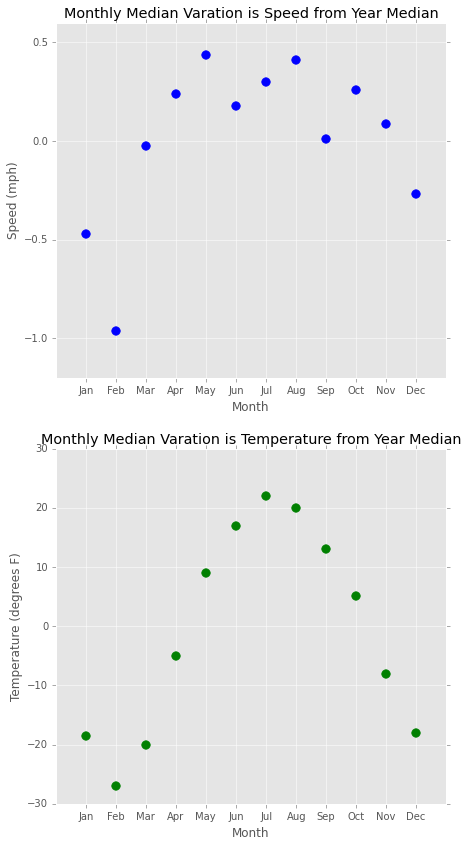

In [71]:
mpl.style.use('ggplot')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x_plot = xrange(1, 13)

fig = plt.figure(figsize = (7, 14))
ax = plt.subplot(211)
ax.scatter(x_plot, median_speeds, marker='o', color='blue', s=75)
ax.set_xticks(x_plot)
ax.set_xticklabels(months)
ax.set_xlim(0, 13)
ax.set_xlabel("Month")
ax.set_ylabel("Speed (mph)")
ax.set_title("Monthly Median Varation is Speed from Year Median")

ax = plt.subplot(212)
ax.scatter(x_plot, median_temps, marker='o', color='green', s=75)
ax.set_xticks(x_plot)
ax.set_xticklabels(months)
ax.set_xlim(0, 13)
ax.set_xlabel("Month")
ax.set_ylabel("Temperature (degrees F)")
ax.set_title("Monthly Median Varation is Temperature from Year Median")

---
#Elevation
---

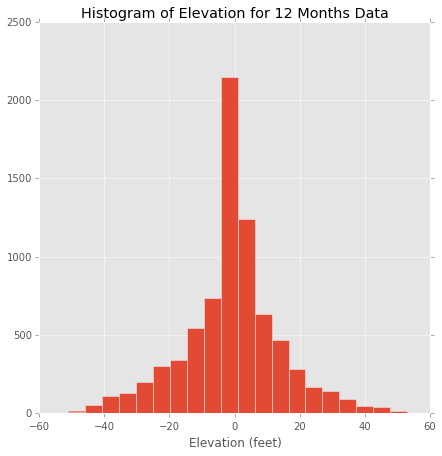

In [78]:
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.hist(dfAll.elev.values, bins = 20)
ax.set_title("Histogram of Elevation for 12 Months Data")
ax.set_xlabel("Elevation (feet)")

---
#Investigating Correlations with Speed
---

In [72]:
np.sort(dfAll.columns)

array(['Unnamed: 0', 'bikeid', 'birth.year', 'day', 'dew', 'distance',
       'elev', 'end.station.id', 'end.station.latitude',
       'end.station.longitude', 'end.station.name', 'fog', 'gender',
       'hail', 'heatindex', 'hum', 'index', 'month', 'precip', 'rain',
       'snow', 'speed', 'start.station.id', 'start.station.latitude',
       'start.station.longitude', 'start.station.name', 'starttime',
       'stoptime', 'temp', 'thunder', 'tornado', 'tripduration',
       'usertype', 'visibility', 'windchill', 'windspeed', 'zip'], dtype=object)

In [73]:
dfAll.speed = dfAll.speed.astype(float)
dfAll.temp = dfAll.temp.astype(float)
dfAll.elev = dfAll.elev.astype(float)
dfAll.windspeed = dfAll.windspeed.astype(float)
dfAll.windchill = dfAll.windchill.astype(float)
dfAll.hum = dfAll.hum.astype(float)
dfAll.precip = dfAll.precip.astype(float)

In [74]:
dfres = dfAll[['speed', 'temp', 'elev', 'windspeed', 'windchill', 'hum', 'precip']]

In [76]:
dfres.corrwith(dfres.speed)

speed        1.000000
temp         0.137150
elev        -0.062516
windspeed    0.012526
windchill   -0.118027
hum          0.009349
precip      -0.005448
dtype: float64

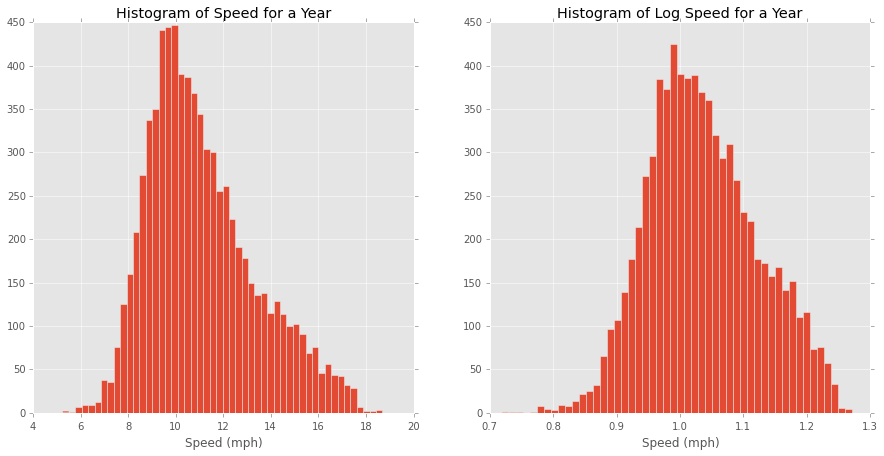

In [82]:
fig = plt.figure(figsize = (15, 7))
ax = plt.subplot(121)
ax.hist(dfres.speed, bins = 50)
ax.set_title("Histogram of Speed for a Year")
ax.set_xlabel("Speed (mph)")

ax = plt.subplot(122)
ax.hist(np.log10(dfres.speed), bins = 50)
ax.set_title("Histogram of Log Speed for a Year")
ax.set_xlabel("Speed (mph)")

In [83]:
dfres.head()

,speed,temp,elev,windspeed,windchill,hum,precip
0,11.631873,44.6,0,-9999.0,-999,46,-9999.00
1,13.543902,44.6,17,-9999.0,-999,76,-9999.00
2,14.370492,44.6,0,-9999.0,-999,66,-9999.00
3,9.353780,46.9,10,3.5,-999,83,0.02
4,13.888636,42.8,-1,-9999.0,-999,81,-9999.00


In [85]:
logspeed = np.log10(dfres.speed)

In [87]:
dfres['logspeed'] = logspeed

/Users/mrgholt/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [88]:
dfres.head()

,speed,temp,elev,windspeed,windchill,hum,precip,logspeed
0,11.631873,44.6,0,-9999.0,-999,46,-9999.00,1.065650
1,13.543902,44.6,17,-9999.0,-999,76,-9999.00,1.131744
2,14.370492,44.6,0,-9999.0,-999,66,-9999.00,1.157472
3,9.353780,46.9,10,3.5,-999,83,0.02,0.970987
4,13.888636,42.8,-1,-9999.0,-999,81,-9999.00,1.142660


In [89]:
dfres.corrwith(dfres.logspeed)

speed        0.992376
temp         0.145286
elev        -0.063907
windspeed    0.011704
windchill   -0.125053
hum          0.007991
precip      -0.006636
logspeed     1.000000
dtype: float64